In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [40]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [41]:
df_sales.describe().astype(int).transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000,55,26,10,32,55,77,99
Quantity,1000,5,2,1,3,5,8,10
Tax 5%,1000,15,11,0,5,12,22,49
Total,1000,322,245,10,124,253,471,1042
cogs,1000,307,234,10,118,241,448,993
gross margin percentage,1000,4,0,4,4,4,4,4
gross income,1000,15,11,0,5,12,22,49
Rating,1000,6,1,4,5,7,8,10


In [42]:
df_sales.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


# 1. Data Cleaning

In [43]:
# Check for duplicated rows
df_sales.duplicated().sum()

0

In [44]:
# Check for missing values

df_sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [45]:
# Drop columns that is not useful

df_sales.drop('Invoice ID', axis=1, inplace=True)
df_sales.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
# Check for the unique values

unique = ['Branch','City','Customer type','Gender','Product line','Payment']
for i in unique:
    print('Unique values in ' + i + ' : ' + str(df_sales[i].unique()))
    print('\n')
    
print ('\nNumber of unique values in Unique variables:\n')
print (df_sales[unique].nunique())

Unique values in Branch : ['A' 'C' 'B']


Unique values in City : ['Yangon' 'Naypyitaw' 'Mandalay']


Unique values in Customer type : ['Member' 'Normal']


Unique values in Gender : ['Female' 'Male']


Unique values in Product line : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


Unique values in Payment : ['Ewallet' 'Cash' 'Credit card']



Number of unique values in Unique variables:

Branch           3
City             3
Customer type    2
Gender           2
Product line     6
Payment          3
dtype: int64


In [47]:
# Convert datetime column to datetime data type
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# 2. Data Vizualization

<Axes: >

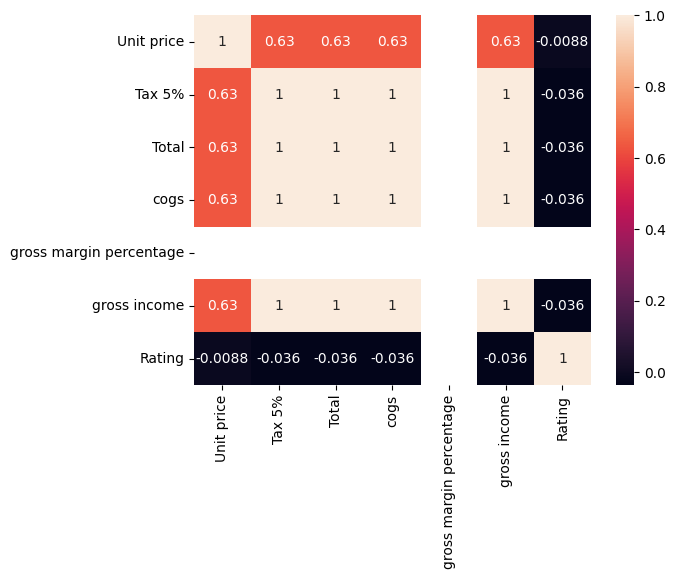

In [48]:
int_df = df_sales.select_dtypes(include='float')
corr_matrix = int_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='rocket')

## 2.1 Sales Distribution

/tmp/ipykernel_33/3436257105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sales['Total'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


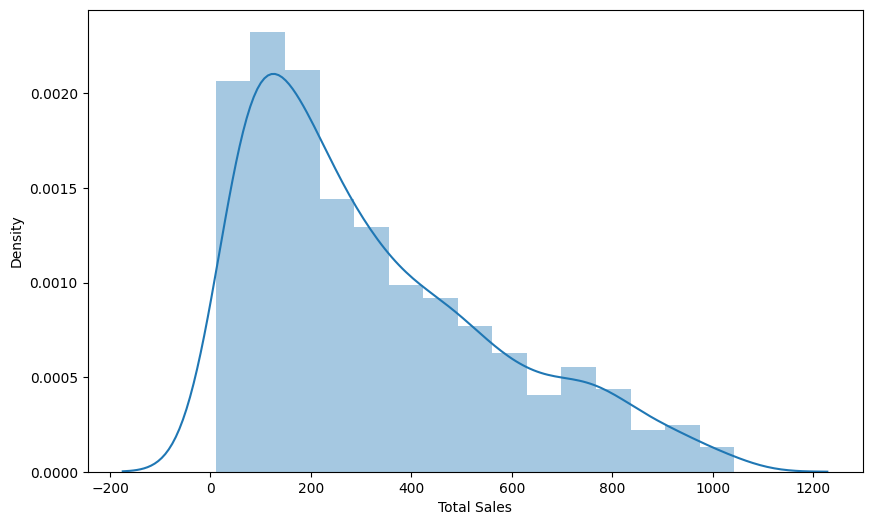

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(df_sales['Total'])
plt.xlabel('Total Sales')
plt.show()

## 2.3 Most Products Sold

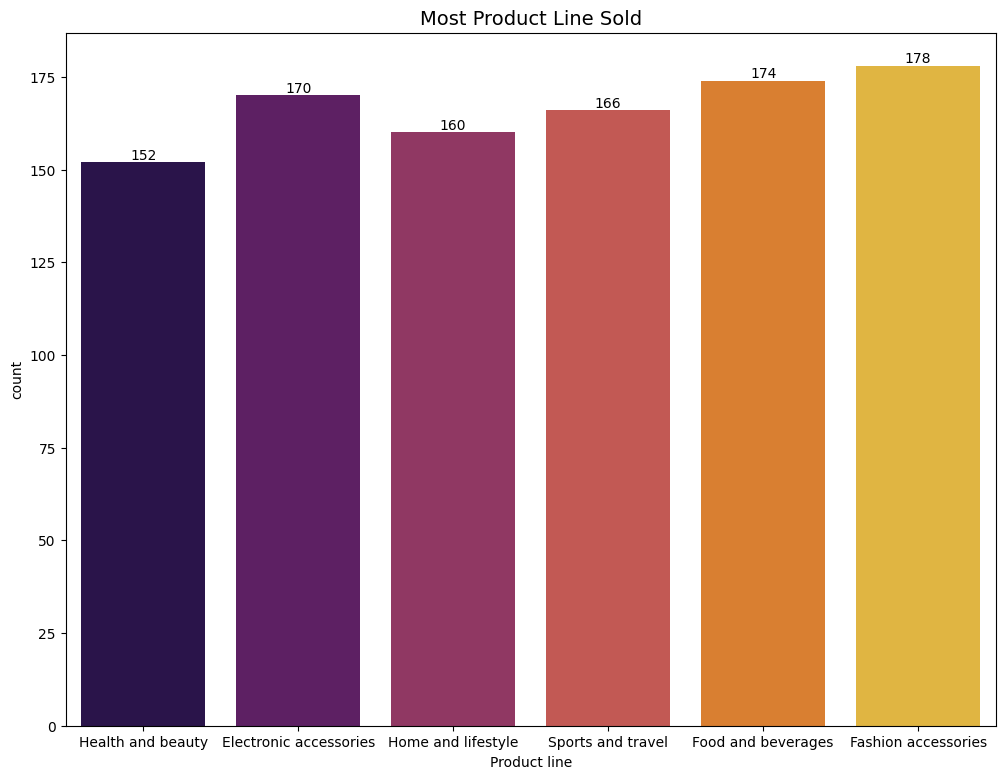

In [50]:
plt.figure(figsize=(12,9))
ax = sns.countplot(x='Product line', data=df_sales, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Most Product Line Sold', fontsize='14')
plt.show()

## 2.4 Top Rated Products

In [51]:
# Create a pivot table
df_rating = pd.pivot_table(df_sales, values='Rating', index='Product line', aggfunc='mean').sort_values(by=['Rating'],ascending=False)
display(df_rating)

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


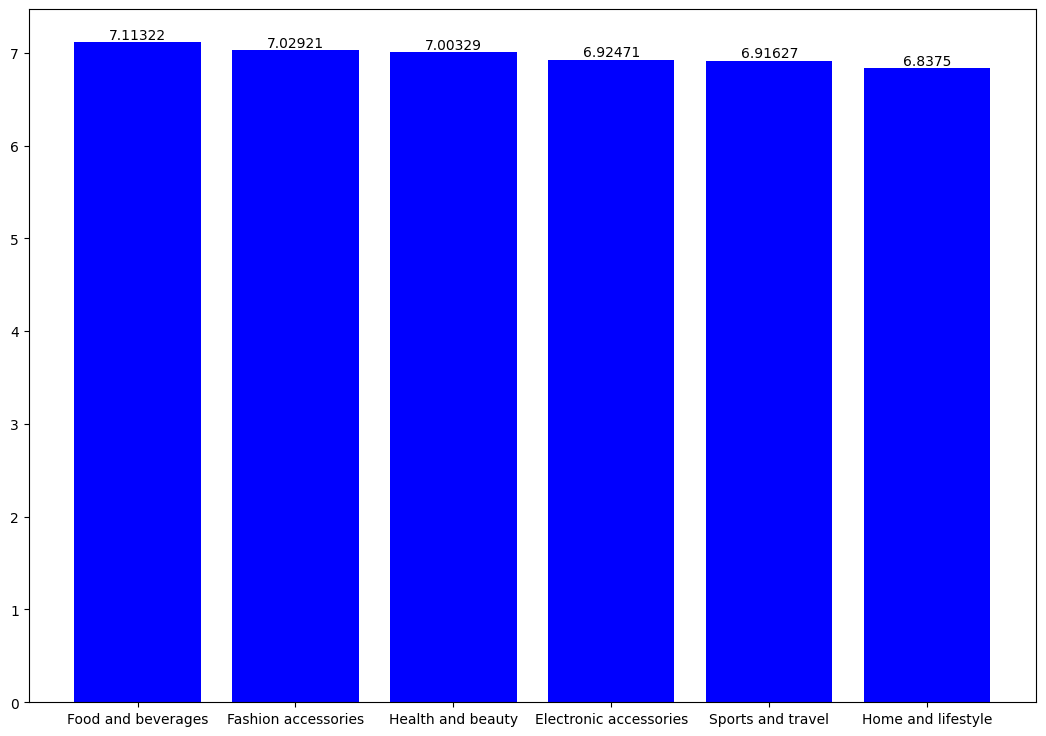

In [52]:
fig, ax = plt.subplots(figsize=(13, 9))
bars = ax.bar(df_rating.index, df_rating['Rating'], color='blue')
ax.bar_label(ax.containers[0])
plt.show()

## 2.5 Customer Types

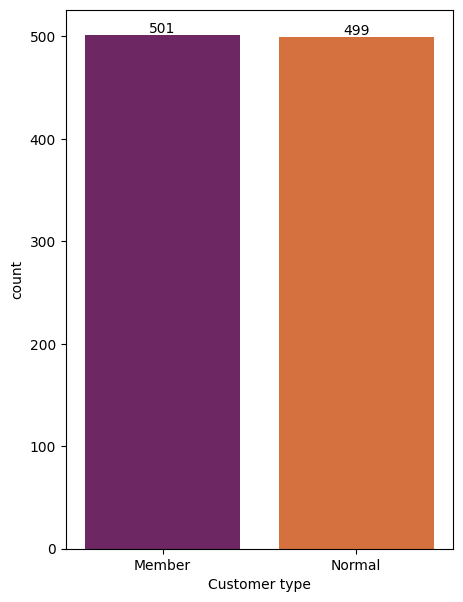

In [53]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=df_sales, x='Customer type', palette='inferno')
ax.bar_label(ax.containers[0])
plt.show()

## 2.6 Customer Types by Gender

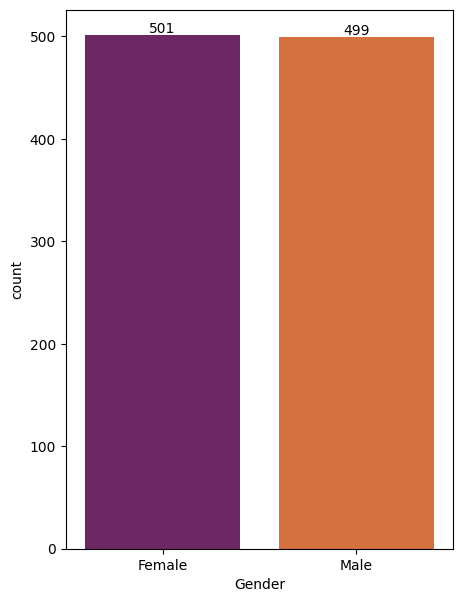

In [54]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=df_sales, x='Gender', palette='inferno')
ax.bar_label(ax.containers[0])
plt.show()

## 2.7 Payment Type

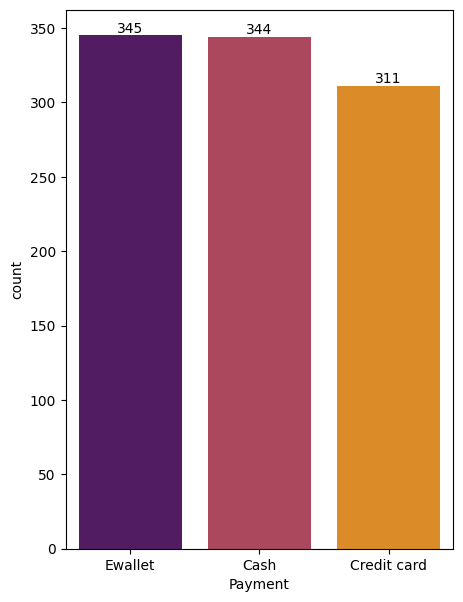

In [55]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=df_sales, x='Payment', palette='inferno')
ax.bar_label(ax.containers[0])
plt.show()

# Sales

## 3.1 Sales Distribution per Product line

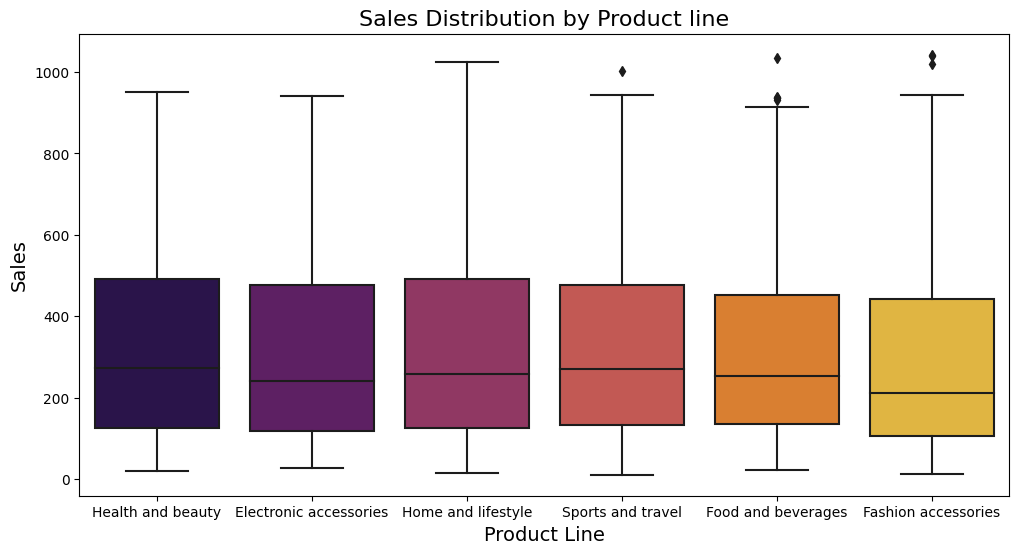

In [56]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(ax=axes, x='Product line', y='Total', data=df_sales, palette='inferno')
axes.set_title('Sales Distribution by Product line', fontsize=16)
axes.set_xlabel('Product Line', fontsize=14)
axes.set_ylabel('Sales', fontsize=14)
plt.show()

## 3.2 Sales Distribution per City

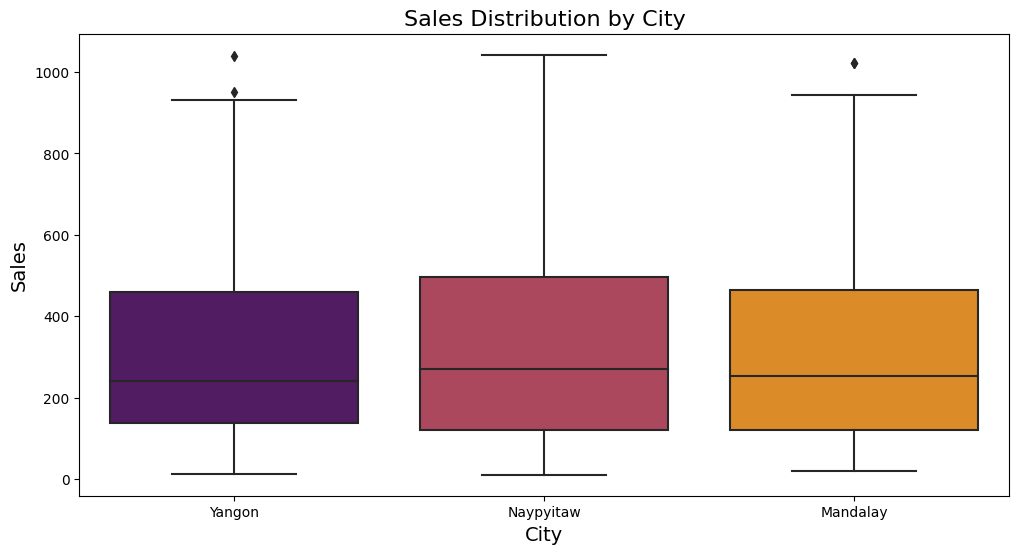

In [57]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(ax=axes, x='City', y='Total', data=df_sales, palette='inferno')
axes.set_title('Sales Distribution by City', fontsize=16)
axes.set_xlabel('City', fontsize=14)
axes.set_ylabel('Sales', fontsize=14)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

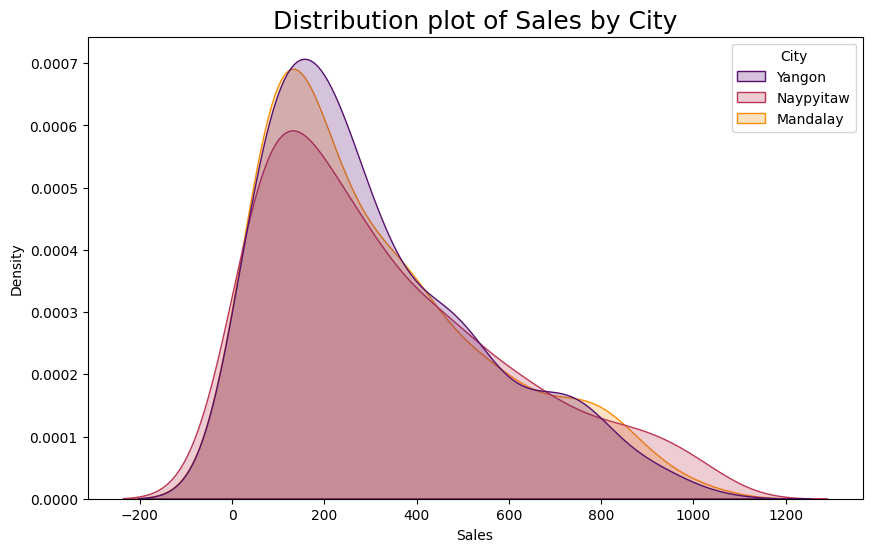

In [58]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Total', hue='City', fill=True, data=df_sales, palette='inferno')
plt.title('Distribution plot of Sales by City', fontsize=18)
plt.xlabel('Sales')
plt.show()

# Annual Gross

/tmp/ipykernel_33/3935389798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sales['gross income'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


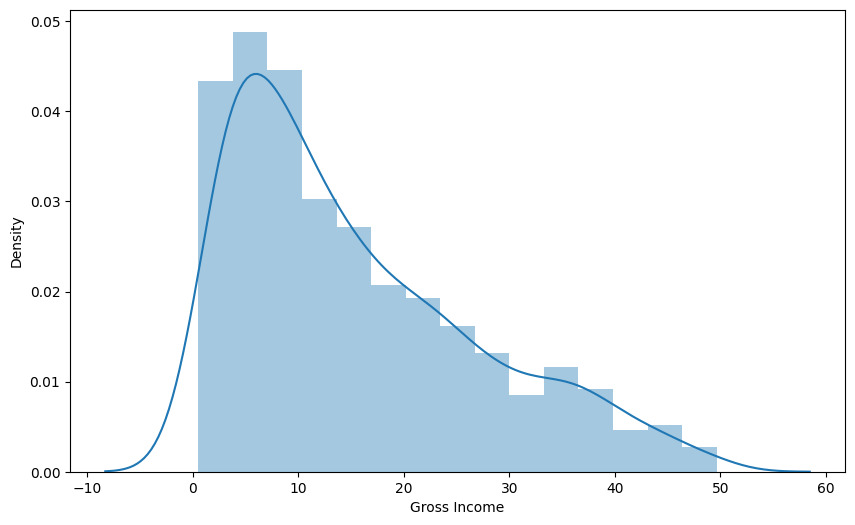

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(df_sales['gross income'])
plt.xlabel('Gross Income')
plt.show()

In [71]:
# Sort DataFrame by 'Date' column
df_sorted = df_sales.sort_values(by='Date')

# Calculate total gross income
total_gross_income = df_sorted['gross income'].sum()

# Pivot table to calculate mean and total gross income per date
df_pivot = pd.pivot_table(df_sorted, values='gross income', index='Date', aggfunc={'mean', 'sum'}).sort_values(by=['Date'], ascending=True)

# Rename columns in the pivot table
df_pivot.columns = ['Mean Gross Income', 'Total Gross Income']

# Add the total gross income as a new row to the pivot table
total_row = pd.DataFrame({'Mean Gross Income': df_pivot['Mean Gross Income'].mean(), 'Total Gross Income': total_gross_income}, index=['Total'])
df_pivot = pd.concat([df_pivot, total_row])

# Display the pivot table
print("Pivot Table with Mean and Total Gross Income per Date:")
display(df_pivot)

Pivot Table with Mean and Total Gross Income per Date:


,Mean Gross Income,Total Gross Income
2019-01-01 00:00:00,18.830083,225.9610
2019-01-02 00:00:00,11.580375,92.6430
2019-01-03 00:00:00,12.369813,98.9585
2019-01-04 00:00:00,12.886417,77.3185
2019-01-05 00:00:00,14.034458,168.4135
...,...,...
2019-03-27 00:00:00,13.822950,138.2295
2019-03-28 00:00:00,10.616200,106.1620
2019-03-29 00:00:00,23.947875,191.5830
2019-03-30 00:00:00,19.424500,213.6695
